In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## reading the csv dataset file
data = pd.read_csv("framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
## shape of data file
print(data.shape)

(4240, 16)


In [4]:
## information about the dataset
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None


Doing exploratory analysis

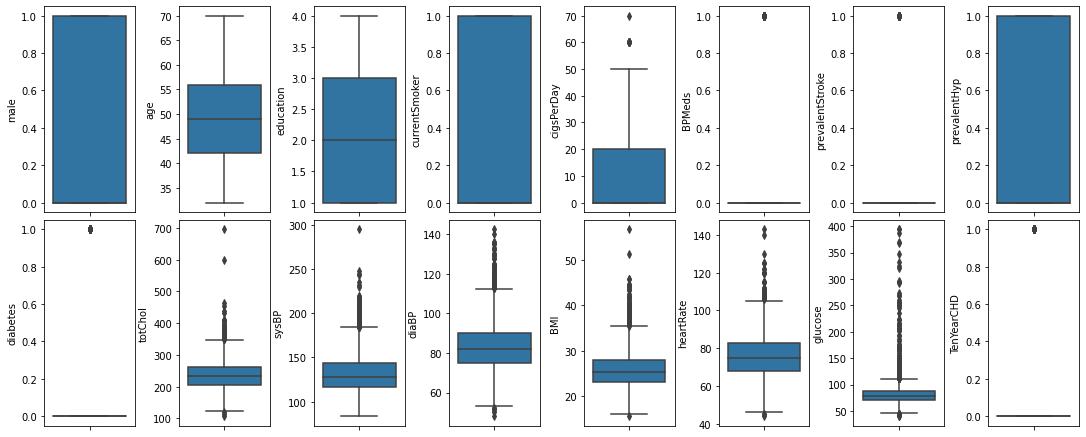

In [5]:
# boxplot of the data
fig, axs = plt.subplots(ncols=8, nrows=2, figsize=(15, 6))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4)

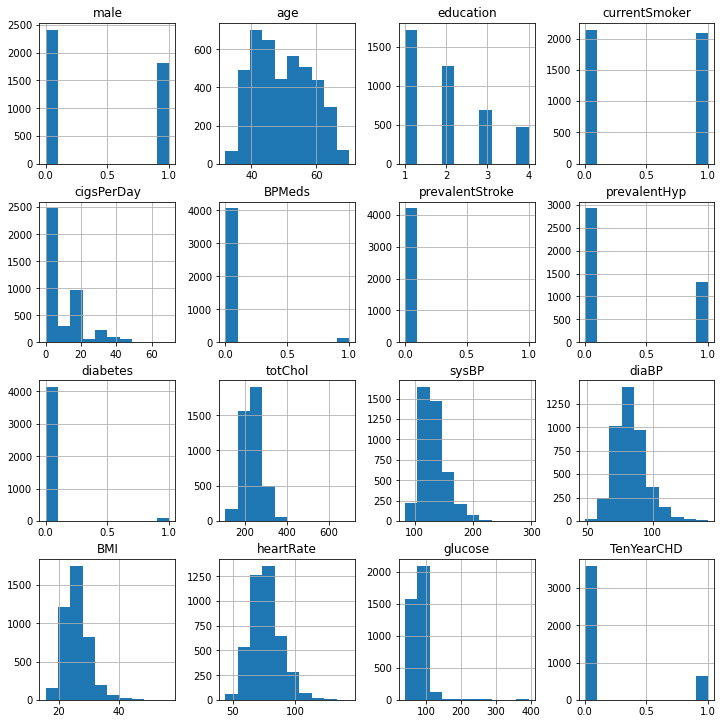

In [6]:
## barchart for the dataset of all cloumn
data.hist(figsize=(10,10))
plt.tight_layout(pad=0.5)
plt.show()

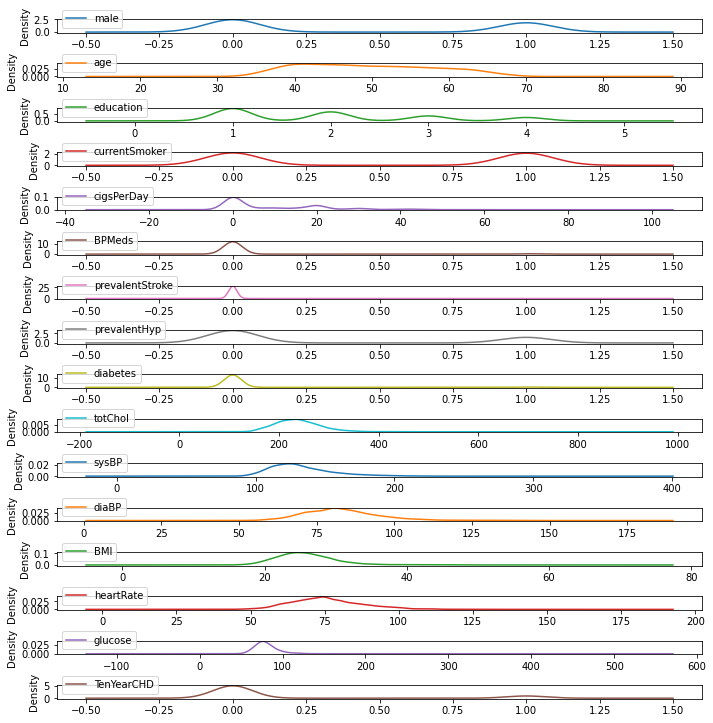

In [7]:
#density plots
data.plot(kind="density",subplots=True,sharex=False,figsize=(10,10))
plt.tight_layout(pad=1)
plt.show()

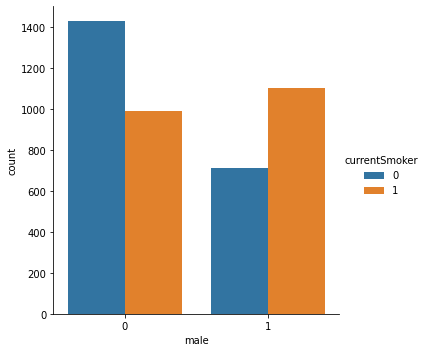

In [8]:
#current smoker based on their sex

sns.catplot(data=data, kind='count', x='male',hue='currentSmoker')
plt.show()

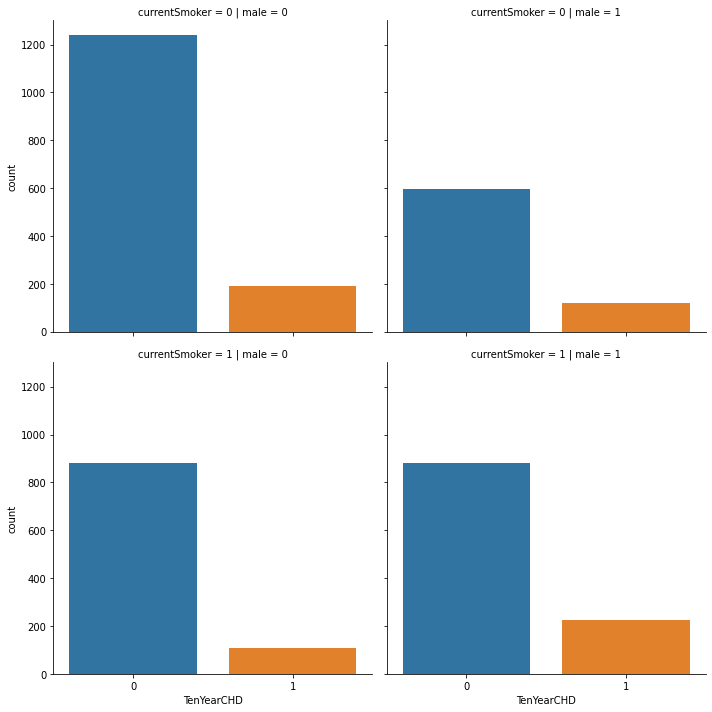

In [9]:
# number of people affected by CHD in 10 years based on their current smoking
sns.catplot(data=data, kind='count', x='TenYearCHD', col='male',row='currentSmoker')
plt.show()

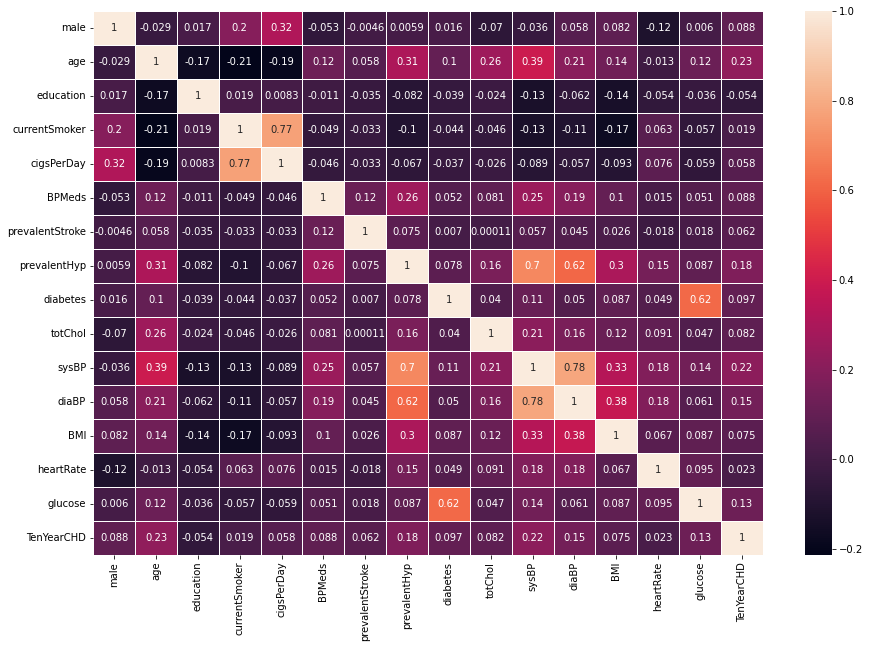

In [10]:
## plotting heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, color="purple", linewidths=0.8)
plt.show()

In [11]:
data = data.drop("cigsPerDay",axis="columns")

We see a few columns to have a bit high co-relation but they are kind of important feature too so we will check later if they have much influence on the model or not. 

After removing cigs per day column our score of the model increases slightly.

In [12]:
print (data.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [13]:
## columns to be replaces by most frequent occurance
freq_cols = ["education","BPMeds","heartRate"]
from sklearn.impute import SimpleImputer
freq_imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
for i in freq_cols:
    data[i] = freq_imp.fit_transform(data[i].to_numpy().reshape(-1,1))

In [14]:
##missing values in columns to be replaced by mean of the column
mean_cols = ["totChol","BMI","glucose"]
mean_imp = SimpleImputer(missing_values=np.nan, strategy="mean")
for i in mean_cols:
    data[i] = freq_imp.fit_transform(data[i].to_numpy().reshape(-1,1))

check again for missing values in dataset

In [15]:
print(data.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [16]:
#removing outliers
outlier_cols = ["totChol","sysBP","diaBP", "BMI","heartRate","glucose"]
for i in outlier_cols:
    data[i] = np.log(data[i])

In [17]:
#splitting dataset into train and test dataset
from sklearn.model_selection import train_test_split
feature_col = data.columns[:14]
X = data[feature_col]
Y = data.TenYearCHD

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.33,random_state=1)

In [18]:
# constructing logistic regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [19]:
#predicting y from trained model
Y_pred_train = log_reg.predict(X_train)
Y_pred_test = log_reg.predict(X_test)

In [20]:
##score of the model
score = log_reg.score(X_test,Y_test)
print (score)

0.8614285714285714


In [21]:
## printing confusion matrix and classification report for test subset
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_test) 
print("Confusion Matrix is:\n",cm)

print("\n\nClassification Report is:\n\n",classification_report(Y_test,Y_pred_test))

Confusion Matrix is:
 [[1195    3]
 [ 191   11]]


Classification Report is:

               precision    recall  f1-score   support

           0       0.86      1.00      0.92      1198
           1       0.79      0.05      0.10       202

    accuracy                           0.86      1400
   macro avg       0.82      0.53      0.51      1400
weighted avg       0.85      0.86      0.81      1400



In [22]:
## printing confusion matrix and classification report for train subset
cm = confusion_matrix(Y_train, Y_pred_train) 
print("Confusion Matrix is:\n",cm)

print("\n\nClassification Report is:\n\n",classification_report(Y_train,Y_pred_train))

Confusion Matrix is:
 [[2389    9]
 [ 418   24]]


Classification Report is:

               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2398
           1       0.73      0.05      0.10       442

    accuracy                           0.85      2840
   macro avg       0.79      0.53      0.51      2840
weighted avg       0.83      0.85      0.79      2840



In [23]:
## K-fold cross validation model
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=10,random_state=100,shuffle=True)
score = cross_val_score(log_reg,X,Y,cv=k_fold)
print (score.mean())

0.8516509433962265


In [24]:
## stratifies cross validation model
from sklearn.model_selection import StratifiedKFold
st_kfold = StratifiedKFold(n_splits = 3, random_state=100,shuffle=True)
score = cross_val_score(log_reg,X,Y,cv=st_kfold)
print (score.mean())

0.8502345533309775


S_No.           Accuracy                               Model Name 


  1                86%                            Logistic Regression

  2              85.16%                K_fold validation model Logistic Regression


  3              85.16%             Stratifies K_fold validation model Logistic Regression  

the best model is the logistic regression giving us 86% accuracy


Real world Applications of Logistic regression

1) Predicts the likelihood of a Bernulli event, where the outcome can only be yes/no or positive/negative.
2) Statistical software to understand the relationship between the dependent variable and one or more independent variables.
3) When a credit card transaction happens, the bank makes a note of several factors. For instance, the date of the transaction, amount, place, type of purchase, etc. Based on these factors, they develop a Logistic Regression model of whether or not the transaction is a fraud.